In [1]:
'''
LAB: Glass Identification
'''

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## PART 1

# read data into a DataFrame
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 header=None, names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type'],
                 index_col='id')
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Question 1. Are there any null values? If so, where?

df.isnull().sum()

ri            0
na            0
mg            0
al            0
si            0
k             0
ca            0
ba            0
fe            0
glass_type    0
dtype: int64

In [11]:
# Question 2. Is this problem classification or regression?

classification



NameError: name 'classification' is not defined

In [4]:
# Question 3: Create a new column called "glass_type_binary"
# convert to binary classification problem:
#   types 1/2/3/4 are mapped to 0 in glass_type_binary
#   types 5/6/7 are mapped to 1 in glass_type_binary



glasstypebinary = {1:0,2:0,3:0,4:0,5:1,6:1,7:1}
df['glass_type_binary'] = df.glass_type.apply(lambda x: glasstypebinary[x])

df



,ri,na,mg,al,si,k,ca,ba,fe,glass_type,glass_type_binary
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1,0
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1,0
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1,0
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1,0
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1,0


In [5]:
## PART 2 Setting it all up

# create a list of feature names
feature_cols = ['ri','na','mg','al','si','k','ca','ba','fe']


# define X (features) and y (response)
X = df[feature_cols]        # features
y = df.glass_type_binary    # binary response
y2 = df.glass_type          # multinomial response

In [6]:
# the null accuracy rate is an accuracy rate in which you always predict the majority class in
# a prediction problem. 
# Question 4: What is the null accuracy rate for the binomial and the multinomial problem?
df.glass_type_binary.value_counts()
163./(163+51)



0.7616822429906542

In [7]:
# Question 4: What is the null accuracy rate for the binomial and the multinomial problem?

df.glass_type_binary.value_counts()
51./(163+51)

0.2383177570093458

In [17]:
## PART 3
# fit a KNN model and make predictions with the binary response. 


# Question 5: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores3 = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores5 = cross_val_score(knn, X, y, cv=5, scoring='accuracy')


print scores
print scores3
print scores5

print np.mean(scores)   
print np.mean(scores3) 
print np.mean(scores5) 

#out_of_sample = [1.521, 13.6, 4.49, 1.10, 71.78, 0.06, 8.75, 0.0, 0.0]
#print knn.predict(out_of_sample)



[ 0.95454545  0.86046512  0.93023256  0.78571429  0.97619048]
[ 0.90909091  0.8372093   0.88372093  0.71428571  0.97619048]
[ 0.84090909  0.86046512  0.88372093  0.71428571  1.        ]
0.901429578174
0.864099466425
0.859876170341


0.901869158879
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


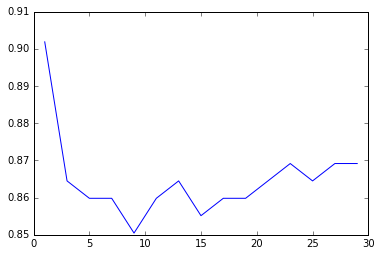

In [8]:
# Question 6: Use grid search to find the optimal value of K and the best accuracy rate

from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]

plt.figure()
plt.plot(k_range, grid_mean_scores)

print grid.best_score_  
print grid.best_params_
print grid.best_estimator_ 

#does this mean that the optimal value of K is 1? and the best accuracy rate is 0.90?



In [9]:

# Question 7: did your best score beat the null accuracy rate for the binary response?

yes?


Object `yes` not found.


In [10]:
## PART 4
# fit a KNN model and make predictions with the multinomial response. 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y2)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y2, cv=5, scoring='accuracy')
scores

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y2)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores3 = cross_val_score(knn, X, y2, cv=5, scoring='accuracy')

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y2)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores5 = cross_val_score(knn, X, y2, cv=5, scoring='accuracy')


print scores
print scores3
print scores5
print np.mean(scores) 
print np.mean(scores3) 
print np.mean(scores5) 

# Question 8: Fit a KNN model with 1 3, and 5 neighbors
# Be sure to use cross validation to get an accurate prediction of out of sample error



# Question 10: did your best score beat the null accuracy rate for the multinomial response?



[ 0.55555556  0.65909091  0.65116279  0.61904762  0.725     ]
[ 0.51111111  0.63636364  0.58139535  0.57142857  0.725     ]
[ 0.48888889  0.63636364  0.58139535  0.61904762  0.725     ]
0.641971374878
0.605059733548
0.610139098627


0.640186915888
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


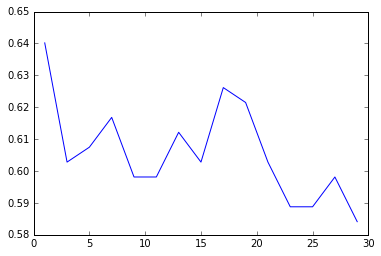

In [44]:
# Question 9: Use grid search to find the optimal value of K and the best accuracy rate
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y2)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]

plt.figure()
plt.plot(k_range, grid_mean_scores)

print grid.best_score_  
print grid.best_params_
print grid.best_estimator_ 

#does this mean that the optimal value of k is 1 and the best accuracy rate is 0.64?

In [12]:
## PART 5 Fine tuning our data

# As we learned previously, KNN is sensitive to irrelevant and non-scaled columns
# Let's use sklearn to clean it up
from sklearn import preprocessing

# scale all data to a zero mean  and unit variance (std = 1)
#what does it mean to scale all data to a zero mean????
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = feature_cols
X_scaled

# Question 11: Try all of the previous steps to grid search the optimal KNN model. 
# But this time used the scaled X values instead.
# Do you better accuracy with scaled data?

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
scores

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores3 = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)       # instantiate the estimator

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores5 = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')


print scores
print scores3
print scores5

print np.mean(scores)   
print np.mean(scores3) 
print np.mean(scores5) 



[ 0.86363636  0.79069767  0.90697674  0.83333333  0.97619048]
[ 0.81818182  0.8372093   0.90697674  0.78571429  0.97619048]
[ 0.84090909  0.81395349  0.88372093  0.78571429  1.        ]
0.874166918353
0.86485452532
0.864859559046


0.883177570093
{'n_neighbors': 27}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')


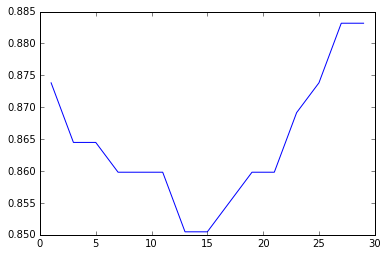

In [13]:
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]

plt.figure()
plt.plot(k_range, grid_mean_scores)

print grid.best_score_  
print grid.best_params_
print grid.best_estimator_ 

# accuracy of 0.88 is lower than 0.90 for unscaled data?

In [ ]:
# Try playing around with different features (removing some) and seeing if this helps improve overall
# predictive power.
# Hint, try making a method that takes in feature columns and runs the entire process in order to compre
# faster